In [63]:
import rdkit
import numpy as np
import matplotlib.pyplot as plt
import sklearn

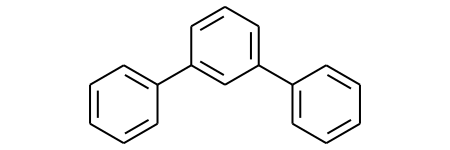

In [64]:
mol = rdkit.Chem.MolFromSmiles('c1ccc(-c2cccc(-c3ccccc3)c2)cc1')
mol

In [65]:
a = np.array(rdkit.Chem.RDKFingerprint(mol))

In [66]:
a.sum(), a.min(), a.max()

(120, 0, 1)

In [67]:
len(a)

2048

In [68]:
from rlmolecule.molecule.builder.builder import MoleculeBuilder
from rlmolecule.molecule.molecule_state import MoleculeState

from rdkit.Chem.QED import qed
import rdkit.Chem

builder = MoleculeBuilder(max_atoms=6, min_atoms=1, atom_additions=['C', 'N', 'O'])
start = MoleculeState(rdkit.Chem.MolFromSmiles('C'), builder)

In [69]:
def get_fingerprint(mol):
    return np.array(rdkit.Chem.RDKFingerprint(mol))

def iter_states(start):
    for next_state in start.get_next_actions():
        yield get_fingerprint(next_state.molecule)
        yield from iter_states(next_state)

In [70]:
from itertools import islice

In [71]:
first_mols = np.stack(list(islice(iter_states(start), 5000)))

In [73]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=256)

In [79]:
x = pca.fit_transform(first_mols)

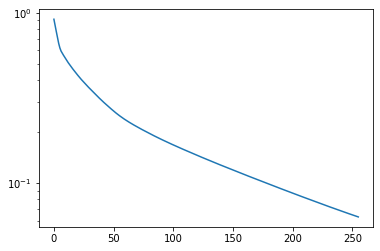

In [80]:
fig, ax = plt.subplots()
_ = ax.plot(1 - np.cumsum(pca.explained_variance_ratio_))
_ = ax.set_yscale("log")

In [82]:
import pickle
with open("pca-256.p", "wb") as f:
    pickle.dump(pca, f)

In [83]:
with open("pca-256.p", "rb") as f:
    pca = pickle.load(f)
x = pca.transform(first_mols)

In [84]:
x = pca.transform(first_mols[0, None, :])
x.shape

(1, 256)

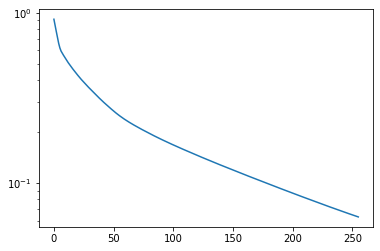

In [85]:
fig, ax = plt.subplots()
_ = ax.plot(1 - np.cumsum(pca.explained_variance_ratio_))
_ = ax.set_yscale("log")

In [86]:
x.shape, x.min(), x.max(), isinstance(pca, sklearn.decomposition._pca.PCA), pca.n_features_

((1, 256), -1.8926513628183204, 0.5463822286835706, True, 2048)

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

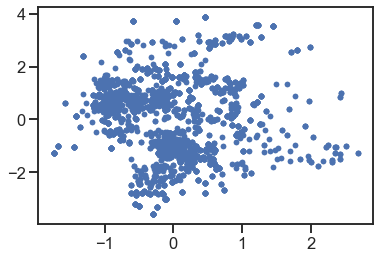

In [54]:
plt.plot(x[:, 8], x[:, 1], '.')